In [1]:
!cd ../networkx && git checkout uniform_cost && git status && pip install -r requirements.txt && pip install -e .

M	networkx/algorithms/shortest_paths/__init__.py
A	networkx/algorithms/shortest_paths/greedy.py
Your branch is up to date with 'origin/uniform_cost'.
On branch uniform_cost
Your branch is up to date with 'origin/uniform_cost'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   networkx/algorithms/shortest_paths/__init__.py
	new file:   networkx/algorithms/shortest_paths/greedy.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	01-Tree.ipynb
	02-Graph_Search.ipynb

Obtaining file:///C:/Users/Marco/networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5rc1.dev20200408120114
    Uninstalling networkx-2.5rc1.dev20200408120114:
      Successfully uninstalled networkx-2.5rc1.dev20200408120114
  Running setup.py develop for networkx


Already on 'uniform_cost'


In [2]:
%matplotlib inline

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

## Preparazione

Creiamo una mappa di adiacenza, corredata di pesi:

In [4]:
romania_neighbours = dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142))

Aggiungiamo le posizioni assolute delle città come coordinate (x,y):

In [5]:
romania_plot_positions = dict(
    Arad=(92, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Creiamo un grafo:

In [6]:
g = nx.Graph()

Aggiungiamo i nodi:

In [7]:
node_labels = {}
for city, _ in romania_plot_positions.items():
    g.add_node(city, position=romania_plot_positions[city])
    node_labels[city]=city

Possiamo recuperare le proprietà di un nodo:

In [8]:
g.nodes['Arad']['position']

(92, 492)

Aggiungiamo gli archi pesati:

In [9]:
for city, neighborhood in romania_neighbours.items():
    for neighbour, distance in neighborhood.items():
        g.add_edge(city, neighbour, weight=distance)

Disegnamo il grafo:

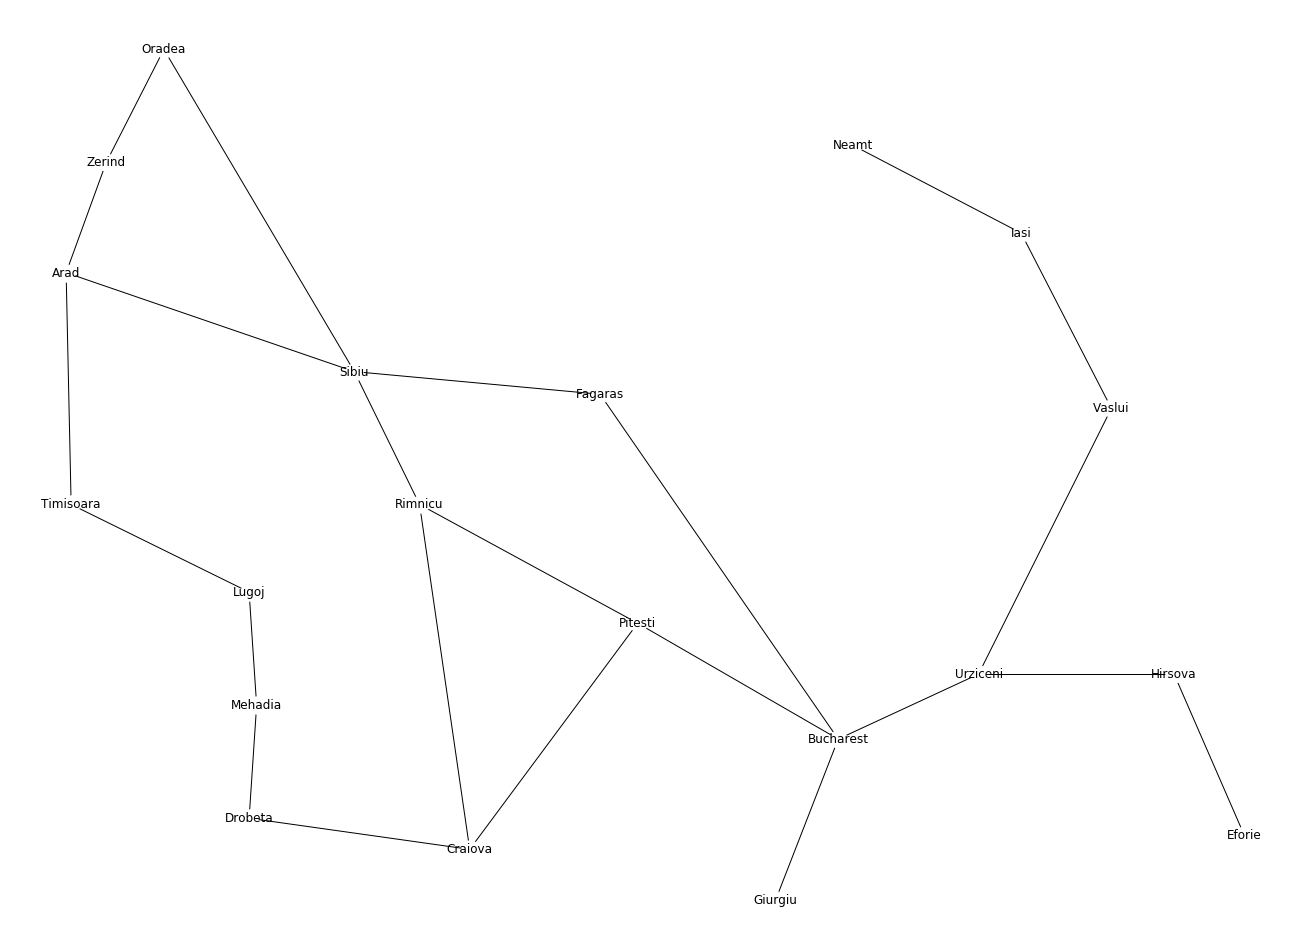

In [10]:
node_label_positions = {k:[v[0],v[1]] for k,v in romania_plot_positions.items()}
plt.figure(figsize=(18,13))
nx.draw(g, pos = node_label_positions, node_color='white')
drawn_labels = nx.draw_networkx_labels(g, pos=node_label_positions, labels=node_labels)

plt.show()

## A*

Definiamo una funzione di distanza che useremo come euristica:

$$dist=\sqrt{(x_1-x_2)^2 +(y_1-y_2)^2}$$

In [11]:
def dist(a, b):
    (x1, y1) = g.nodes[a]['position']
    (x2, y2) = g.nodes[b]['position']
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

Ed ora eseguiamo A*:

In [12]:
nx.astar_path(g, 'Arad', 'Bucharest', heuristic=dist, weight='weight')

['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

In [13]:
nx.astar_path_length(g, 'Arad', 'Bucharest', heuristic=dist, weight='weight')

418

Ma se passiamo un peso fittizio, la funzione sballa perchè `_weight_function` ritorna una funzione con costo 1, diventando una ricerca a costo uniforme:

_(Perchè la ricerca a costo uniforme ritorna questo risultato?)_

## Ricerca guidata dal costo

In [14]:
nx.astar_path(g, 'Arad', 'Bucharest', heuristic=None, weight='dummy')

['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

Possiamo anche utilizzare la sola ricerca basata sul Costo:

In [15]:
nx.dijkstra_path(g, 'Arad', 'Bucharest')

['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

In [16]:
breadth_exploration_tree = nx.bfs_tree(g,'Arad')

Inizio la visita dal nodo  Arad
Sto visitando il nodo  Zerind
Sto visitando il nodo  Sibiu
Sto visitando il nodo  Timisoara
Sto visitando il nodo  Oradea
Sto visitando il nodo  Fagaras
Sto visitando il nodo  Rimnicu
Sto visitando il nodo  Lugoj
Sto visitando il nodo  Bucharest
Sto visitando il nodo  Craiova
Sto visitando il nodo  Pitesti
Sto visitando il nodo  Mehadia
Sto visitando il nodo  Urziceni
Sto visitando il nodo  Giurgiu
Sto visitando il nodo  Drobeta
Sto visitando il nodo  Hirsova
Sto visitando il nodo  Vaslui
Sto visitando il nodo  Eforie
Sto visitando il nodo  Iasi
Sto visitando il nodo  Neamt


In [17]:
breadth_exploration_tree

In [18]:
list(breadth_exploration_tree.edges)

[('Arad', 'Zerind'),
 ('Arad', 'Sibiu'),
 ('Arad', 'Timisoara'),
 ('Zerind', 'Oradea'),
 ('Sibiu', 'Fagaras'),
 ('Sibiu', 'Rimnicu'),
 ('Timisoara', 'Lugoj'),
 ('Fagaras', 'Bucharest'),
 ('Rimnicu', 'Craiova'),
 ('Rimnicu', 'Pitesti'),
 ('Lugoj', 'Mehadia'),
 ('Bucharest', 'Urziceni'),
 ('Bucharest', 'Giurgiu'),
 ('Craiova', 'Drobeta'),
 ('Urziceni', 'Hirsova'),
 ('Urziceni', 'Vaslui'),
 ('Hirsova', 'Eforie'),
 ('Vaslui', 'Iasi'),
 ('Iasi', 'Neamt')]

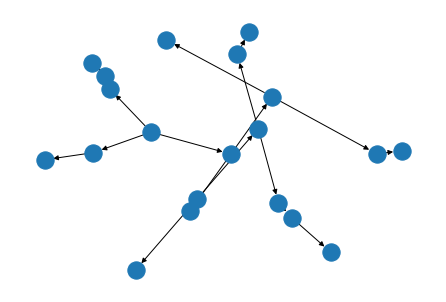

In [19]:
nx.draw(breadth_exploration_tree)

In [20]:
depth_exploration_tree = nx.dfs_tree(g,'Arad')

Inizio la visita dal nodo  Arad
Sto visitando il nodo  Zerind
Sto visitando il nodo  Oradea
Sto visitando il nodo  Sibiu
Sto visitando il nodo  Fagaras
Sto visitando il nodo  Bucharest
Sto visitando il nodo  Urziceni
Sto visitando il nodo  Hirsova
Sto visitando il nodo  Eforie
Sto visitando il nodo  Vaslui
Sto visitando il nodo  Iasi
Sto visitando il nodo  Neamt
Sto visitando il nodo  Pitesti
Sto visitando il nodo  Craiova
Sto visitando il nodo  Drobeta
Sto visitando il nodo  Mehadia
Sto visitando il nodo  Lugoj
Sto visitando il nodo  Timisoara
Sto visitando il nodo  Rimnicu
Sto visitando il nodo  Giurgiu


In [21]:
depth_exploration_tree

In [22]:
list(depth_exploration_tree.edges)

[('Arad', 'Zerind'),
 ('Zerind', 'Oradea'),
 ('Oradea', 'Sibiu'),
 ('Sibiu', 'Fagaras'),
 ('Fagaras', 'Bucharest'),
 ('Bucharest', 'Urziceni'),
 ('Bucharest', 'Pitesti'),
 ('Bucharest', 'Giurgiu'),
 ('Urziceni', 'Hirsova'),
 ('Urziceni', 'Vaslui'),
 ('Hirsova', 'Eforie'),
 ('Vaslui', 'Iasi'),
 ('Iasi', 'Neamt'),
 ('Pitesti', 'Craiova'),
 ('Craiova', 'Drobeta'),
 ('Craiova', 'Rimnicu'),
 ('Drobeta', 'Mehadia'),
 ('Mehadia', 'Lugoj'),
 ('Lugoj', 'Timisoara')]

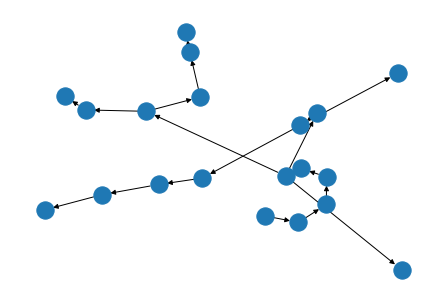

In [23]:
nx.draw(depth_exploration_tree)
plt.show()

## Greedy Search

In [24]:
nx.greedy_path(g, 'Arad', 'Bucharest', heuristic=dist, weight='weight')

['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

## Beam Search

In [25]:
def relative_distance(node):
    return dist('Arad',node)

Inizio la visita dal nodo  Arad
Sto visitando il nodo  Sibiu
Sto visitando il nodo  Timisoara
Sto visitando il nodo  Fagaras
Sto visitando il nodo  Rimnicu
Sto visitando il nodo  Lugoj
Sto visitando il nodo  Bucharest
Sto visitando il nodo  Craiova
Sto visitando il nodo  Pitesti
Sto visitando il nodo  Mehadia
Sto visitando il nodo  Urziceni
Sto visitando il nodo  Giurgiu
Sto visitando il nodo  Drobeta
Sto visitando il nodo  Hirsova
Sto visitando il nodo  Vaslui
Sto visitando il nodo  Eforie
Sto visitando il nodo  Iasi
Sto visitando il nodo  Neamt


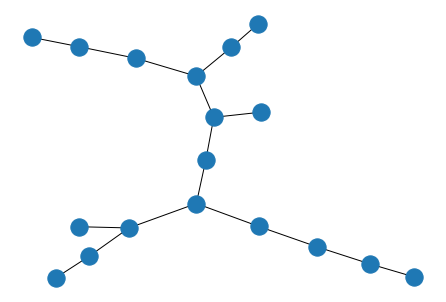

In [26]:
edges = list(nx.bfs_beam_edges(g, source='Arad', value=relative_distance, width=2))
bfs_graph = nx.Graph()
bfs_graph.add_edges_from(edges)
nx.draw(bfs_graph)